<a href="https://colab.research.google.com/github/Jeswin987/predictive-analytics/blob/master/Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = 'cars.csv'
df = pd.read_csv(url)
# Get dataset dimensions
num_rows, num_columns = df.shape
print(f"Dataset Dimensions: {num_rows} rows, {num_columns} columns")

# Get number of instances (observations)
num_instances = df.shape[0]

print(f"Number of Instances (Observations): {num_instances}")


Dataset Dimensions: 5076 rows, 18 columns
Number of Instances (Observations): 5076


In [7]:
# Check for duplicated rows
num_duplicates = df.duplicated().sum()

print(f"Number of Duplicated Rows: {num_duplicates}")

# Remove duplicated rows if any
df = df.drop_duplicates()

print(f"Dataset after removing duplicates: {df.shape[0]} rows, {df.shape[1]} columns")


Number of Duplicated Rows: 18
Dataset after removing duplicates: 5058 rows, 18 columns


In [31]:
# Create a new target variable 'Performance_Score'
df['Performance_Score'] = (df['Engine Information.Engine Statistics.Horsepower'] +
                            df['Engine Information.Engine Statistics.Torque'] +
                            df['Fuel Information.City mpg'] +
                            df['Fuel Information.Highway mpg'])

In [9]:
columns_to_drop = ['Color', 'Condition', 'Dimensions.Width']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_columns)

# Drop rows with missing 'Performance_Score'
df = df.dropna(subset=['Performance_Score'])

# Fill missing values for numerical columns with their mean
num_cols = ['Dimensions.Height', 'Dimensions.Length', 'Fuel Information.City mpg',
            'Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower',
            'Engine Information.Engine Statistics.Torque']
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing values for categorical columns with the mode
cat_cols = ['Engine Information.Driveline', 'Engine Information.Engine Type',
            'Engine Information.Transmission', 'Fuel Information.Fuel Type',
            'Identification.Classification', 'Identification.Make']
for col in cat_cols:
  if col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

num_categorical_variables = len(categorical_columns)

print(f"Number of Categorical Variables: {num_categorical_variables}")
print(f"Categorical Variables: {list(categorical_columns)}")


Number of Categorical Variables: 8
Categorical Variables: ['Engine Information.Driveline', 'Engine Information.Engine Type', 'Engine Information.Transmission', 'Fuel Information.Fuel Type', 'Identification.Classification', 'Identification.ID', 'Identification.Make', 'Identification.Model Year']


In [11]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_numerical_variables = len(numerical_columns)

print(f"Number of Numerical Variables: {num_numerical_variables}")
print(f"Numerical Variables: {list(numerical_columns)}")


Number of Numerical Variables: 9
Numerical Variables: ['Dimensions.Height', 'Dimensions.Length', 'Engine Information.Number of Forward Gears', 'Fuel Information.City mpg', 'Fuel Information.Highway mpg', 'Identification.Year', 'Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque', 'Performance_Score']


In [12]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


df = df.drop(columns=['Identification.ID', 'Identification.Year', 'Identification.Model Year'])  # Adjust based on relevance

# Split the data into training and testing sets
X = df.drop(columns=['Performance_Score'])
y = df['Performance_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
scaler = StandardScaler()

# Fit and transform training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
model = LinearRegression()

# Train Model
model.fit(X_train_scaled, y_train)

# Predict Performance Score
y_pred = model.predict(X_test_scaled)

In [15]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

Mean Absolute Error: 1.6813819961928194
Mean Squared Error: 209.40481693448413
Root Mean Squared Error: 14.470826408138691
R-squared Score: 0.9942098130732802


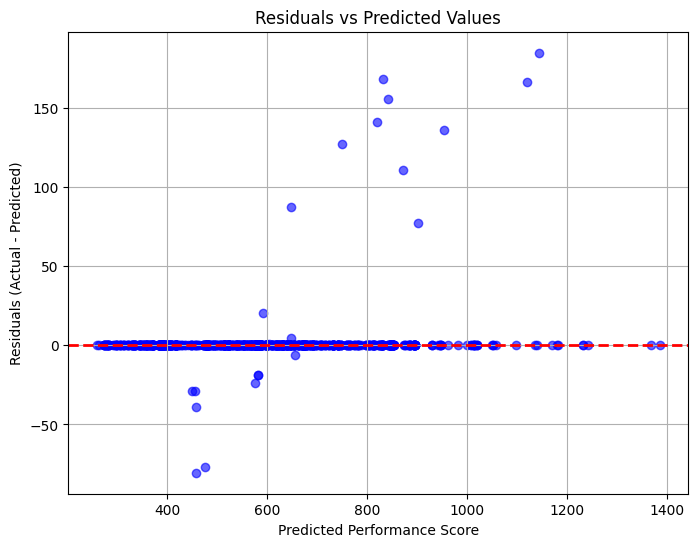

In [23]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Predicted Performance Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()


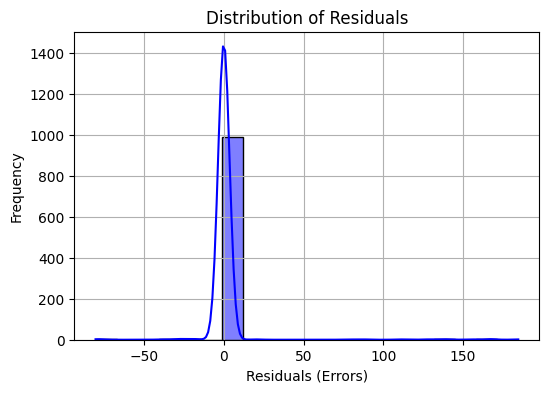

In [22]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=20, kde=True, color='blue')
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()